In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algorithm

In [3]:
iris= pd.read_csv('C:\\Users\\Udita\\Downloads\\iris-species.zip')

In [5]:
iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


In [24]:
print(len(iris))

150


In [31]:
print(iris.shape)

(150, 5)


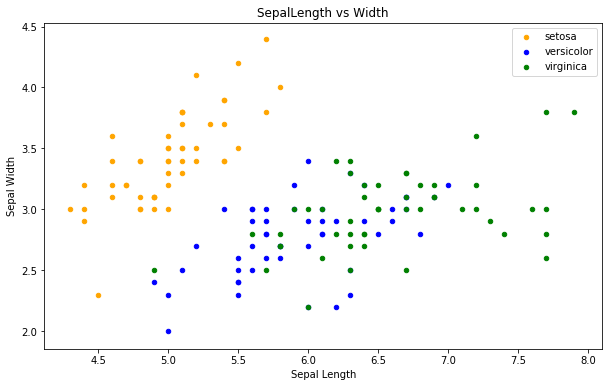

In [39]:
fig= iris[iris.Species=='Iris-setosa'].plot(kind='scatter' ,x='SepalLengthCm' ,y='SepalWidthCm' ,color='orange' ,label='setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter' ,x='SepalLengthCm' ,y='SepalWidthCm' ,color='blue' ,label='versicolor' ,ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter' ,x='SepalLengthCm' ,y='SepalWidthCm' ,color='green' ,label='virginica' ,ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("SepalLength vs Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

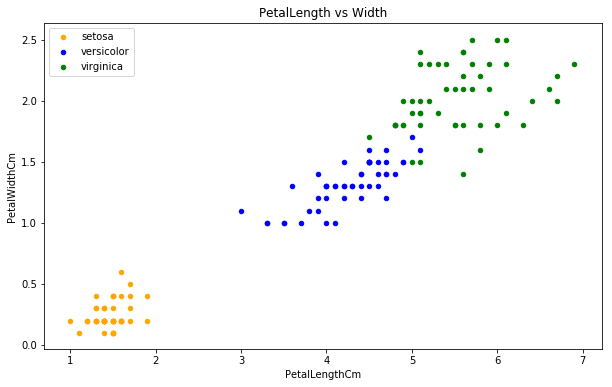

In [46]:
fig= iris[iris.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm' ,y='PetalWidthCm' ,color='orange', label='setosa')
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm' ,y='PetalWidthCm' ,color='blue' ,label='versicolor' ,ax=fig)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm' ,y='PetalWidthCm' ,color='green' ,label='virginica' ,ax=fig)
fig.set_xlabel("PetalLengthCm")
fig.set_ylabel("PetalWidthCm")
fig.set_title("PetalLength vs Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

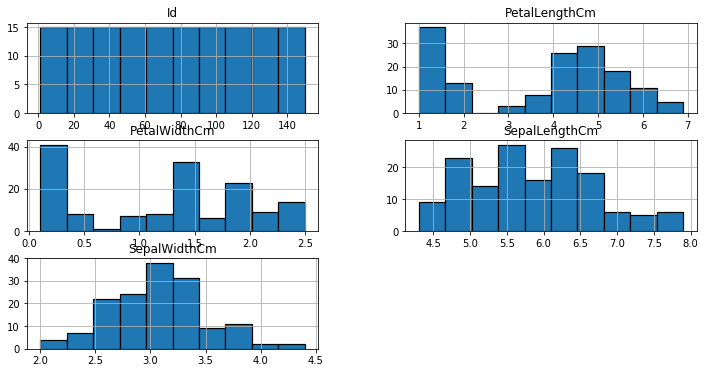

In [6]:
#Here we see that Petal features gives a better Cluster Division Compared to Sepal features. 
#This indicates that sepals can help in better and accurate predictions than Sepals.

#Now distribution of length and width
iris.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()


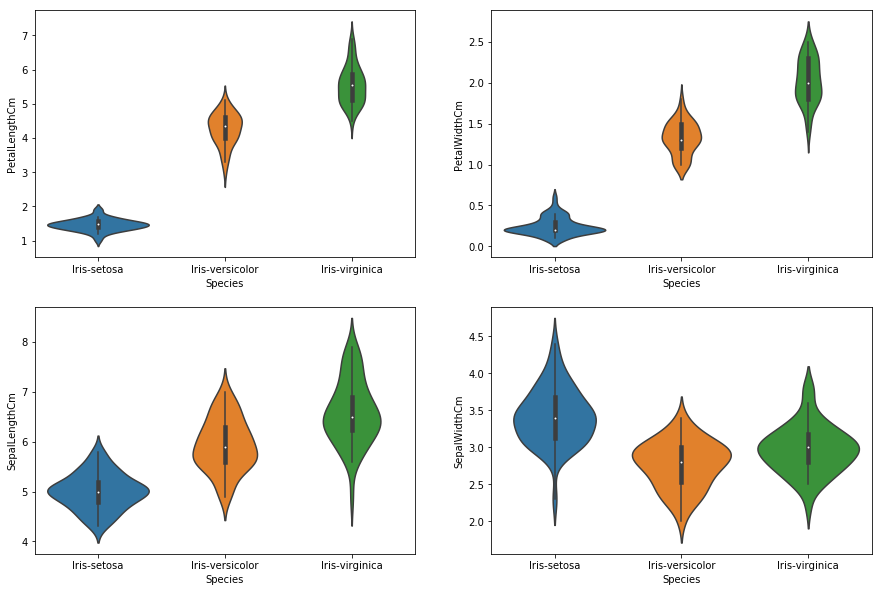

In [7]:
#Variation in length and width according to species
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)

In [8]:
#Splitting The Data into Training And Testing Dataset

train, test = train_test_split(iris, test_size = 0.3)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 6)
(45, 6)


In [9]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]# taking the training data features
train_y=train.Species# output of our training data
test_X= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data features
test_y =test.Species   #output value of test data

In [10]:
#Checking the Train and Test Dataset

train_X.head(2)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
30,4.8,3.1,1.6,0.2
26,5.0,3.4,1.6,0.4


In [11]:
test_X.head(2)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
103,6.3,2.9,5.6,1.8
116,6.5,3.0,5.5,1.8


In [12]:
train_y.head()  ##output of the training data

30        Iris-setosa
26        Iris-setosa
130    Iris-virginica
111    Iris-virginica
135    Iris-virginica
Name: Species, dtype: object

In [13]:
#Decision Tree Accuracy

model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 0.8666666666666667


In [14]:
# Creating Petals and Sepals training data
petal=iris[['PetalLengthCm','PetalWidthCm','Species']]
sepal=iris[['SepalLengthCm','SepalWidthCm','Species']]
train_p,test_p=train_test_split(petal,test_size=0.3,random_state=0)  #petals
train_x_p=train_p[['PetalWidthCm','PetalLengthCm']]
train_y_p=train_p.Species
test_x_p=test_p[['PetalWidthCm','PetalLengthCm']]
test_y_p=test_p.Species


train_s,test_s=train_test_split(sepal,test_size=0.3,random_state=0)  #Sepal
train_x_s=train_s[['SepalWidthCm','SepalLengthCm']]
train_y_s=train_s.Species
test_x_s=test_s[['SepalWidthCm','SepalLengthCm']]
test_y_s=test_s.Species

In [15]:
model=DecisionTreeClassifier()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Decision Tree using Petals is: 0.9555555555555556
The accuracy of the Decision Tree using Sepals is: 0.6444444444444445
